
# Wales Road Accident  Data Analysis 


**Title**: A Python Notebook that Reports, Analyses and Visualises Wales Road Accident Data

**Author**: Bashir Solomon

**Student Number**: 30014453

**Overview** : This Python notebook aims to report, analyse and visualise Road Accidents Data recorded by the Welsh Police Force. The latter is responsible for the Wales local authorities districts of the United Kingdom. Road accidents are one of the most critical factors contributing to untimely deaths and economic losses to public and private property. It is important to find sustainable countermeasures to minimise road accidents. The efficiency of accident prevention depends on the reliability of reported data, analysis performed and interpretation of results. 



#### Datasets Acquired

1. Road Safety - Accidents last 5 years (between 2016-2020) 

   *Link to the data - https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-accident-last-5-years.csv*


2. Road Safety Open Dataset Data Guide (located in the Supporting documents section)

   *Link to the guide/document - https://data.dft.gov.uk/road-accidents-safety-data/Road-Safety-Open-Dataset-Data-Guide.xlsx*


### Installing Python Packages via PIP

In [ ]:
#Install the relevant python packages required for analysis and visualisation
!pip install pandas 
!pip install numpy

!pip install matplotlib
!pip install seaborn
!pip install plotly

!pip install folium

### Importing Python Libraries


In [2]:
#Import the required Python libraries/packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import datetime

### Importing the required dataset as a DataFrame
*The Road Safety - Accidents within the last 5 years (between 2016-2020) dataset was downloaded from the data.gov.uk website as a CSV file.*

The dataset is imported into the notebook and stored as a DataFrame using the **pandas.read_csv** function



In [ ]:
#Import the required dataset using Pandas Read CSV function
accidents_df = pd.read_csv('dft-road-casualty-statistics-accident-last-5-years.csv')

## Exploratory Data Analysis and Data Cleaning

Exploratory data analysis entails examining a data set's main characteristics, usually using visualisation techniques and summary statistics. Before further evaluations, the data needs to be understood, patterns discovered, anomalies detected, and assumptions checked.

Exploratory data analysis is crucial if effective data cleaning is to be done.

The first five rows of the accidents DataFrame are displayed using the **pandas.DataFrame.head** method

In [4]:
#Display the first five rows of the accidents DataFrame
accidents_df.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2016010000005           2016          010000005               519310.0   
1  2016010000006           2016          010000006               551920.0   
2  2016010000008           2016          010000008               505930.0   
3  2016010000016           2016          010000016               527770.0   
4  2016010000018           2016          010000018               510740.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                188730.0  -0.279323  51.584754             1   
1                174560.0   0.184928  51.449595             1   
2                183850.0  -0.473837  51.543563             1   
3                168930.0  -0.164442  51.404958             1   
4                177230.0  -0.406580  51.483139             1   

   accident_severity  number_of_vehicles  ...  \
0                  3                   2  ...   
1                  3                   1  ...   
2                  3                   1  ...   
3                  3                   1  ...   
4                  3                   2  ...   

   pedestrian_crossing_physical_facilities light_conditions  \
0                                        0                5   
1                                        0                4   
2                                        0                4   
3                                        0                1   
4                                        0                1   

   weather_conditions road_surface_conditions  special_conditions_at_site  \
0                   1                       1                           0   
1                   1                       1                           0   
2                   1                       1                           0   
3                   1                       1                           0   
4                   1                       1                           0   

  carriageway_hazards urban_or_rural_area  \
0                   0                   1   
1                   0                   1   
2                   0                   1   
3                   0                   1   
4                   0                   1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            1                2   
1                                            1                2   
2                                            1                2   
3                                            1                2   
4                                            1                2   

   lsoa_of_accident_location  
0                  E01000543  
1                  E01000375  
2                  E01033725  
3                  E01003379  
4                  E01002583  

[5 rows x 36 columns]

The last four rows of the DataFrame are displayed using the **pandas.DataFrame.tail** method by passing in a value of 4 to the method 

In [5]:
#Display the last five rows of the accidents DataFrame
accidents_df.tail(4)

accident_index  accident_year accident_reference  \
597969  2020991029573           2020          991029573   
597970  2020991030297           2020          991030297   
597971  2020991030900           2020          991030900   
597972  2020991032575           2020          991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
597969               257963.0                658891.0  -4.267565  55.802353   
597970               383664.0                810646.0  -2.271903  57.186317   
597971               277161.0                674852.0  -3.968753  55.950940   
597972               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...  \
597969            99                  3                   1  ...   
597970            99                  2                   2  ...   
597971            99                  3                   2  ...   
597972            99                  3                   1  ...   

        pedestrian_crossing_physical_facilities light_conditions  \
597969                                        0                1   
597970                                        0                1   
597971                                        0                1   
597972                                        0                1   

        weather_conditions road_surface_conditions  \
597969                   1                       1   
597970                   1                       1   
597971                   1                       1   
597972                   1                       1   

        special_conditions_at_site carriageway_hazards urban_or_rural_area  \
597969                           0                   0                   1   
597970                           0                   0                   2   
597971                           0                   0                   1   
597972                           0                   2                   1   

        did_police_officer_attend_scene_of_accident  trunk_road_flag  \
597969                                            2               -1   
597970                                            1               -1   
597971                                            2               -1   
597972                                            1               -1   

        lsoa_of_accident_location  
597969                         -1  
597970                         -1  
597971                         -1  
597972                         -1  

[4 rows x 36 columns]

The **pandas.DataFrame.info** method provides all the information about the columns in the DataFrame including the column types, non-null values and memory usage.

The verbose parameter of the pandas.DataFrame.info method was passed in a boolean value of True to provide even more information about the DataFrame. 

In [6]:
#Display information of all the columns the DataFrame
accidents_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597973 entries, 0 to 597972
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               597973 non-null  object 
 1   accident_year                                597973 non-null  int64  
 2   accident_reference                           597973 non-null  object 
 3   location_easting_osgr                        597850 non-null  float64
 4   location_northing_osgr                       597850 non-null  float64
 5   longitude                                    597840 non-null  float64
 6   latitude                                     597840 non-null  float64
 7   police_force                                 597973 non-null  int64  
 8   accident_severity                            597973 non-null  int64  
 9   number_of_vehicles                           597973 non-nul

### Data Cleaning

On further inspection of the accidents DataFrame, some columns were dropped since there will not be used to perform further analysis.

In [7]:
#Drop unrequired columns in the DataFrame
accidents_df.drop(['location_easting_osgr','location_northing_osgr','local_authority_ons_district','local_authority_highway','first_road_number','second_road_number','lsoa_of_accident_location', 'trunk_road_flag'],axis=1, inplace=True)

There are now 28 columns left in the DataFrame which will be further explored.

In [8]:
#Display information of all the columns the DataFrame
accidents_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597973 entries, 0 to 597972
Columns: 28 entries, accident_index to did_police_officer_attend_scene_of_accident
dtypes: float64(3), int64(21), object(4)
memory usage: 127.7+ MB


The columns used for further analysis are listed below.

In [9]:
#lists the name on current colums in the DataFrame in an array format
list(accidents_df.columns)


['accident_index',
 'accident_year',
 'accident_reference',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'first_road_class',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident']

#### Filtering out Records of Accidents that occured outside of Wales

The accidents DataFrame is filtered using the **pandas.DataFrame.loc** method to display only accident cases that were handled by the Welsh police force.

There are four police forces in Wales: Dyfed Powys, Gwent, North Wales and South Wales police forces. These police force record accidents that occur within Wales. In the accidents DataFrame, the police forces are represented with numbers. The Road Safety Open Dataset Data Guide highlights what each number in the dataset represent:

60-North Wales, 61-Gwent, 62-South Wales, 63-Dyfed Powys

In [10]:
#Select cases handled by the Welsh Police forces
wales_accident = accidents_df.loc[(accidents_df['police_force'] >= 60) & (accidents_df['police_force'] <= 63)]

The **pandas.DataFrame.shape** function returns a tuple (a finite ordered list) that represents the dimentionality (rows and columns) of the DataFrame. 

There are now 20881 records in the DataFrame.

In [11]:
#Shows the number of rows and columns in the Wales Accidents DataFrame
wales_accident.shape

(20881, 28)

The **pandas.DataFrame.isNull.sum** method adds up all the null values present within the dataset. The longitude and latitude columns each contain 13 missing or null values. The rows associated with these null values will not be removed prior to the production of the heatmap visualisation since the rows are still relevant in performing some further analysis.

In [12]:
#Adds up all the missing values detected in the Wales Accident DataFrame
wales_accident.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
longitude                                      13
latitude                                       13
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
first_road_class                                0
road_type                                       0
speed_limit                                     0
junction_detail                                 0
junction_control                                0
second_road_class                               0
pedestrian_crossing_human_control               0


The first five rows of the Wales accidents DataFrame are displayed using the pandas.DataFrame.head method. The rows in the DataFrame still retained their index position prior to selecting only accident records within Wales.

In [13]:
#Display the first five rows of the Wales accidents DataFrame
wales_accident.head()

accident_index  accident_year accident_reference  longitude   latitude  \
123353  201660T069774           2016          60T069774  -2.972152  53.212242   
123354  201660U000212           2016          60U000212  -4.258982  52.967692   
123355  201660U000400           2016          60U000400  -3.644616  52.946190   
123356  201660U000436           2016          60U000436  -3.806557  53.322118   
123357  201660U001770           2016          60U001770  -3.082571  53.061559   

        police_force  accident_severity  number_of_vehicles  \
123353            60                  3                   2   
123354            60                  1                   1   
123355            60                  3                   1   
123356            60                  3                   3   
123357            60                  2                   3   

        number_of_casualties        date  ...  second_road_class  \
123353                     2  09/03/2016  ...                  5   
123354                     1  01/01/2016  ...                  4   
123355                     1  01/01/2016  ...                  6   
123356                     1  01/01/2016  ...                 -1   
123357                     1  04/01/2016  ...                  4   

       pedestrian_crossing_human_control  \
123353                                 0   
123354                                 0   
123355                                 0   
123356                                 0   
123357                                 0   

        pedestrian_crossing_physical_facilities  light_conditions  \
123353                                        0                 1   
123354                                        0                 4   
123355                                        0                 1   
123356                                        0                 1   
123357                                        0                 4   

        weather_conditions  road_surface_conditions  \
123353                   1                        1   
123354                   1                        2   
123355                   5                        2   
123356                   2                        2   
123357                   2                        2   

        special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
123353                           0                    0                    2   
123354                           0                    0                    2   
123355                           0                    0                    2   
123356                           0                    0                    1   
123357                           0                    0                    2   

        did_police_officer_attend_scene_of_accident  
123353                                            2  
123354                                            1  
123355                                            1  
123356                                            1  
123357                                            1  

[5 rows x 28 columns]

The **pandas.DataFrame.reset_index** reinitializes the starting position of the rows in the Wales DataFrame to zero (0).
The drop parameter was set to True to prevent the old index position from being added to the DataFrame as a new column. The inplace parameter was set to True, allowing the modification of the index position of rows in the DataFrame.

In [14]:
#Reset the starting index position of the rows to zero
wales_accident.reset_index(drop=True, inplace=True)

The starting index of the records in the Wales Accident DataFrame is now zero

In [15]:
#Display the first five rows of the Wales accidents DataFrame - The Starting index is now zero
wales_accident.head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  201660T069774           2016          60T069774  -2.972152  53.212242   
1  201660U000212           2016          60U000212  -4.258982  52.967692   
2  201660U000400           2016          60U000400  -3.644616  52.946190   
3  201660U000436           2016          60U000436  -3.806557  53.322118   
4  201660U001770           2016          60U001770  -3.082571  53.061559   

   police_force  accident_severity  number_of_vehicles  number_of_casualties  \
0            60                  3                   2                     2   
1            60                  1                   1                     1   
2            60                  3                   1                     1   
3            60                  3                   3                     1   
4            60                  2                   3                     1   

         date  ...  second_road_class pedestrian_crossing_human_control  \
0  09/03/2016  ...                  5                                 0   
1  01/01/2016  ...                  4                                 0   
2  01/01/2016  ...                  6                                 0   
3  01/01/2016  ...                 -1                                 0   
4  04/01/2016  ...                  4                                 0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        0                 1   
1                                        0                 4   
2                                        0                 1   
3                                        0                 1   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   1                        1                           0   
1                   1                        2                           0   
2                   5                        2                           0   
3                   2                        2                           0   
4                   2                        2                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                    2   
1                    0                    2   
2                    0                    2   
3                    0                    1   
4                    0                    2   

   did_police_officer_attend_scene_of_accident  
0                                            2  
1                                            1  
2                                            1  
3                                            1  
4                                            1  

[5 rows x 28 columns]

## Data Analysis (Further EDA) and Data Visualisation

The Road Safety Open Dataset Data Guide provided on the data.gov.uk website serves as a lookup table that interprets what cells in the Accidents dataset represents. The blocks of data or keys in the Wales accidents DataFrame were mapped to the value they represent in the form of Python Dictionaries by using the **pandas.DataFrame.replace** method. 

The inplace parameter was set to True, allowing the modification of data in the DataFrame.

In [ ]:
#Mapping data in the Dataframe to values they represent
wales_accident.accident_year.replace({2016:'2016',2017:'2017',2018:'2018',2019:'2019',2020:'2020'}, inplace=True)
wales_accident.police_force.replace({60:'North Wales',61:'Gwent',62:'South Wales',63:'Dyfed-Powys'}, inplace=True)
wales_accident.accident_severity.replace({1:'Fatal',2:'Serious',3:'Slight'}, inplace=True)
wales_accident.day_of_week.replace({1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday'}, inplace=True)
wales_accident.local_authority_district.replace({720:'Isle of Anglesey',721:'Conwy',722:'Gwynedd',723:'Denbighshire',724:'Flintshire',725:'Wrexham',730:'Bleanu Gwent',731:'Caerphilly',732:'Monmouthshire',733:'Newport',734:'Torfaen',740:'Bridgend',741:'Cardiff',742:'Merthyr Tydfil',743:'Neath Port Talbot',744:'Rhondda Cynon Taff',745:'Swansea',746:'The Vale of Glamorgan',750:'Ceredigion',751:'Carmarthenshire',752:'Pembrokeshire',753:'Powys',-1:'Data missing or out of range'}, inplace=True)
wales_accident.first_road_class.replace({1:'Motorway',2:'A(M)',3:'A',4:'B',5:'C',6:'Unclassified'},inplace=True)
wales_accident.road_type.replace({1:'Roundabout',2:'One way street',3:'Dual carriageway',6:'Single carriageway',7:'Slip road',9:'Unknown',12:'One way street/Slip road',-1:'Data missing or out of range'}, inplace=True)
wales_accident.junction_detail.replace({0:'Not at junction or within 20 metres',1:'Roundabout',2:'Mini-roundabout',3:'T or staggered junction',5:'Slip road',6:'Crossroads',7:'More than 4 arms (not roundabout)',8:'Private drive or entrance',9:'Other junction',99:'unknown (self reported)',-1:'Data missing or out of range'}, inplace=True)
wales_accident.junction_control.replace({0:'Not at junction or within 20 metres',1:'Authorised person',2:'Auto traffic signal',3:'Stop sign',4:'Give way or uncontrolled',-1:'Data missing or out of range',9:'unknown (self reported)'}, inplace=True)
wales_accident.second_road_class.replace({0:'Not at junction or within 20 metres',1:'Motorway',2:'A(M)',3:'A',4:'B',5:'C',6:'Unclassified',-1:'Data missing or out of range'}, inplace=True)
wales_accident.pedestrian_crossing_human_control.replace({0:'None within 50 metres',1:'Control by school crossing patrol',2:'Control by other authorised person',-1:'Data missing or out of range',9:'unknown (self reported)'}, inplace=True)
wales_accident.pedestrian_crossing_physical_facilities.replace({0:'No physical crossing facilities within 50 metres',1:'Zebra',4:'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',5:'Pedestrian phase at traffic signal junction',7:'Footbridge or subway',8:'Central refuge',-1:'Data missing or out of range',9:'unknown (self reported)'}, inplace=True)
wales_accident.light_conditions.replace({1:'Daylight',4:'Darkness - lights lit',5:'Darkness - lights unlit',6:'Darkness - no lighting',7:'Darkness - lighting unknown',-1:'Data missing or out of range'}, inplace=True)
wales_accident.weather_conditions.replace({1:'Fine no high winds',2:'Raining no high winds',3:'Snowing no high winds',4:'Fine + high winds',5:'Raining + high winds',6:'Snowing + high winds',7:'Fog or mist',8:'Other',9:'Unknown',-1:'Data missing or out of range'}, inplace=True)
wales_accident.road_surface_conditions.replace({1:'Dry',2:'Wet or damp',3:'Snow',4:'Frost or ice',5:'Flood over 3cm. deep',6:'Oil or diesel',7:'Mud',-1:'Data missing or out of range',9:'unknown (self reported)'}, inplace=True)
wales_accident.special_conditions_at_site.replace({0:'None',1:'Auto traffic signal - out',2:'Auto signal part defective',3:'Road sign or marking defective or obscured',4:'Roadworks',5:'Road surface defective',6:'Oil or diesel',7:'Mud',-1:'Data missing or out of range',9:'unknown (self reported)'}, inplace=True)
wales_accident.carriageway_hazards.replace({0:'None',1:'Vehicle load on road',2:'Other object on road',3:'Previous accident',4:'Dog on road',5:'Other animal on road',6:'Pedestrian in carriageway - not injured',7:'Any animal in carriageway (except ridden horse)',-1:'Data missing or out of range',9:'unknown (self reported)'}, inplace=True)
wales_accident.urban_or_rural_area.replace({1:'Urban',2:'Rural',3:'Unallocated',-1:'Data missing or out of range'}, inplace=True)
wales_accident.did_police_officer_attend_scene_of_accident.replace({1:'Yes',2:'No',3:'No - accident was reported using a self completion  form (self rep only)',-1:'Data missing or out of range'}, inplace=True)

The data in the DataFrames have now been replaced with the values the represent as indicated in the Road Safety Open Dataset Data Guide 

In [17]:
#Displays the first five rows of the DataFrame - The data in the DataFrames have now been replaced
wales_accident.head()

accident_index accident_year accident_reference  longitude   latitude  \
0  201660T069774          2016          60T069774  -2.972152  53.212242   
1  201660U000212          2016          60U000212  -4.258982  52.967692   
2  201660U000400          2016          60U000400  -3.644616  52.946190   
3  201660U000436          2016          60U000436  -3.806557  53.322118   
4  201660U001770          2016          60U001770  -3.082571  53.061559   

  police_force accident_severity  number_of_vehicles  number_of_casualties  \
0  North Wales            Slight                   2                     2   
1  North Wales             Fatal                   1                     1   
2  North Wales            Slight                   1                     1   
3  North Wales            Slight                   3                     1   
4  North Wales           Serious                   3                     1   

         date  ...             second_road_class  \
0  09/03/2016  ...                             C   
1  01/01/2016  ...                             B   
2  01/01/2016  ...                  Unclassified   
3  01/01/2016  ...  Data missing or out of range   
4  04/01/2016  ...                             B   

  pedestrian_crossing_human_control  \
0             None within 50 metres   
1             None within 50 metres   
2             None within 50 metres   
3             None within 50 metres   
4             None within 50 metres   

            pedestrian_crossing_physical_facilities       light_conditions  \
0  No physical crossing facilities within 50 metres               Daylight   
1  No physical crossing facilities within 50 metres  Darkness - lights lit   
2  No physical crossing facilities within 50 metres               Daylight   
3  No physical crossing facilities within 50 metres               Daylight   
4  No physical crossing facilities within 50 metres  Darkness - lights lit   

      weather_conditions  road_surface_conditions special_conditions_at_site  \
0     Fine no high winds                      Dry                       None   
1     Fine no high winds              Wet or damp                       None   
2   Raining + high winds              Wet or damp                       None   
3  Raining no high winds              Wet or damp                       None   
4  Raining no high winds              Wet or damp                       None   

  carriageway_hazards urban_or_rural_area  \
0                None               Rural   
1                None               Rural   
2                None               Rural   
3                None               Urban   
4                None               Rural   

  did_police_officer_attend_scene_of_accident  
0                                          No  
1                                         Yes  
2                                         Yes  
3                                         Yes  
4                                         Yes  

[5 rows x 28 columns]

#### The total number of Accidents in Wales from 2016 to 2020

In [18]:
#Determine the total number of accidents recorded from the year 2016 to 2020 in Wales
wales_accident.accident_index.count()

20881

 There were a total of 20,881 accident cases recorded by the Welsh police between 2016 and 2020.

#### 1. Number of Accidents per Year in Wales

In [19]:
#Determine the number of accidents that occurred per year from 2016 to 2020  in Wales
wales_accident.accident_year.value_counts()

2016    4922
2017    4554
2019    4317
2018    4214
2020    2874
Name: accident_year, dtype: int64

The number of accidents in Wales decreased between 2016 to 2020. The year 2016 had the highest number of recorded cases at 4922 accidents, followed by 2017 with 4554. In 2018 there were 4214 accident cases, followed by a slight increase in 2019 with 4317 accident cases recorded. 2020 had the lowest accident cases at 2874.

#### 2. Number of Accidents recorded by Welsh police force

In [20]:
#Determine the number of accidents recorded by each Welsh police force department
wales_accident.police_force.value_counts()

South Wales    7766
Dyfed-Powys    5482
North Wales    4558
Gwent          3075
Name: police_force, dtype: int64

The South Wales police force recorded the highest number of accidents at 7763 cases between the years 2016 and 2020. The next was the Dyfed-Powys police force at 5473 accident cases, then the North Wales police at 4557 accident cases. The Gwent police force recorded the least number of accident cases at 3075.

#### 3. Number of Accidents per each date from 2016 to 2020

In [21]:
#Determine the number of accidents recorded for every date in the last 5 years (from 2016 to 2020).
wales_accident.date.value_counts()

14/01/2016    30
28/01/2016    28
20/04/2019    27
04/12/2018    27
03/06/2016    27
              ..
27/04/2020     1
28/03/2020     1
26/12/2020     1
03/05/2020     1
30/03/2020     1
Name: date, Length: 1825, dtype: int64

The highest number of accidents recorded in the last five years, from 2016 to 2020, was on 14/01/2016 at 30 accident cases.

#### 4. Number of Accidents per Accident severity from 2016 to 2020

In [22]:
#Determine the number of accidents recorded based on the severity of the accidents in the last 5 years (from 2016 to 2020).
wales_accident.accident_severity.value_counts()

Slight     16209
Serious     4217
Fatal        455
Name: accident_severity, dtype: int64

There are far more slight accidents at 16,209 cases than serious and fatal accidents combined. There were 4217 Serious cases and 455 Fatal cases recorded over the last five years, from 2016 to 2020.

#### 5. Number of Accidents per the number of vehicles involved

In [23]:
#Determine the number of accident cases recorded based on the number of vehicles involved in said accidents.
wales_accident.number_of_vehicles.value_counts()

2     11068
1      7211
3      2013
4       466
5        86
6        23
7         8
8         3
10        2
11        1
Name: number_of_vehicles, dtype: int64

Most accident cases recorded in Wales between the years 2016 and 2020 involved two vehicles.

#### 6. Number of Accidents per the number of casualties

In [24]:
#Determine the frequency of casualties based on the number of accidents
wales_accident.number_of_casualties.value_counts()

1     15926
2      3390
3      1023
4       325
5       136
6        51
7        18
10        7
11        3
8         2
Name: number_of_casualties, dtype: int64

Records show that most accidents in Wales between the years 2016 and 2020 resulted in one casualty.

#### 7. Number of Accidents based on the 7 days of the week

In [25]:
#Determine the number of accients cross the 7 days of the week
wales_accident.day_of_week.value_counts()

Friday       3446
Wednesday    3016
Thursday     2998
Tuesday      2971
Monday       2916
Saturday     2898
Sunday       2636
Name: day_of_week, dtype: int64

The number of accidents across the seven days of the week is quite similar, with the highest being Friday and the least being Sunday.  

#### 8. Number of Accidents based on time of the day

In [26]:
#Determine the number of accients based on time of the day
wales_accident.time.value_counts().head(10)

15:30    155
17:00    151
15:00    147
14:00    140
16:30    140
18:00    136
16:00    129
17:30    127
13:00    123
12:00    120
Name: time, dtype: int64

Based on the records, most accidents in Wales tend to be between 12 pm and 6 pm, with 15:30 being the highest likelihood of an accident occurring.

#### 9. Number of Accidents per local authority district

The highest number of accident cases recorded was in Cardiff at 2000 cases, with Carmarthenshire in second at 1811 cases. The district having the least number of accidents was Bleanu Gwent, with 327 accident cases.

In [27]:
#Determine the number of accidents that happen in each local authority district of Wales
wales_accident.local_authority_district.value_counts()

Cardiff                         2001
Carmarthenshire                 1812
Powys                           1660
Swansea                         1458
Rhondda Cynon Taff              1364
Pembrokeshire                   1195
Newport                         1009
Flintshire                       907
Gwynedd                          859
Conwy                            837
Bridgend                         835
Caerphilly                       834
Wrexham                          824
Ceredigion                       806
Denbighshire                     779
Neath Port Talbot                777
The Vale of Glamorgan            690
Monmouthshire                    502
Torfaen                          402
Merthyr Tydfil                   379
Isle of Anglesey                 352
Bleanu Gwent                     327
Data missing or out of range     272
Name: local_authority_district, dtype: int64

#### 10. Number of Accidents per first road classification

In [28]:
#Determine the number of accidents based on the first road classification
wales_accident.first_road_class.value_counts()

A               9733
Unclassified    7267
B               3275
Motorway         591
C                  8
A(M)               7
Name: first_road_class, dtype: int64

According to the records, most accidents occured in first road classified as A. However, a significant number of the first road are unclassified.

#### 11. Number of Accidents based on junction details

In [29]:
#Determine at what type of junction did accidents happen 
wales_accident.junction_detail.value_counts()

Not at junction or within 20 metres    10441
T or staggered junction                 4980
Roundabout                              1847
Crossroads                              1251
Other junction                          1043
Private drive or entrance                749
Slip road                                225
More than 4 arms (not roundabout)        190
Mini-roundabout                          155
Name: junction_detail, dtype: int64

    The highest number of accidents occured in areas where there were no junctions

#### 12. Number of Accidents based on light conditions

In [30]:
#Determine the number of accident cases based on lighting condition
wales_accident.light_conditions.value_counts()

Daylight                        15491
Darkness - lights lit            3351
Darkness - no lighting           1681
Darkness - lights unlit           180
Darkness - lighting unknown       177
Data missing or out of range        1
Name: light_conditions, dtype: int64

The highest number of accident cases in Wales from 2016 to 2020 happen in Daylight. This maybe as a result of more cars travelling during daylight. 

#### 13. Number of Accidents based on weather conditions

In [31]:
#Determine the number of accident cases based on weather condition
wales_accident.weather_conditions.value_counts()

Fine no high winds              16236
Raining no high winds            3128
Raining + high winds              473
Other                             348
Unknown                           257
Fine + high winds                 219
Snowing no high winds              96
Fog or mist                        89
Snowing + high winds               34
Data missing or out of range        1
Name: weather_conditions, dtype: int64

The highest number of accident cases in Wales (2016 to 2020) occured in fine no high winds weather conditions.

#### 14. Number of Accidents based on road surface conditions

In [32]:
wales_accident.road_surface_conditions.value_counts()

Dry                             13961
Wet or damp                      6504
Frost or ice                      266
Snow                               98
Flood over 3cm. deep               38
Data missing or out of range        8
unknown (self reported)             6
Name: road_surface_conditions, dtype: int64

The highest number of accident cases in Wales (2016 to 2020) occured in dry conditions. This again may be due to more vehicle movements occuring during dry conditions. It is also important to note that a significant number of accidents occure during wet conditions.

#### 15. Number of Accidents in urban or rural areas

In [33]:
#Determine the number of accidents in urban or rural areas of Wales
wales_accident.urban_or_rural_area.value_counts()

Rural          11833
Urban           9035
Unallocated       13
Name: urban_or_rural_area, dtype: int64

According to the data, accidents in Wales tend to occur more in rural areas than in urban areas.

## Data Visualisation

The data analysis performed above was visualised through a series of bar charts for a more straightforward interpretation or understanding.
The python libraries used to create these visualisations were the **Matplotlib** and **Seaborn** modules.

The style sheet used was **ggplot** (grammar of graphics plot). The ggplot style sheet allows the building of data visualizations in a very succint and consistentmanner. 

The properties and default style of the plots were customised using the **rcParams** (runtime configuration Parameters) attribute.



In [34]:
# Setting up visuals configuration and customisations
plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['text.color'] = 'black'

The name of some of the columns from the wales accident DataFrame was placed in a list.

In [35]:
#Store the name of columns from the wales accident DataFrame in a list
accident_cols = ['accident_year', 'police_force', 'accident_severity','day_of_week','first_road_class', 'road_type', 'speed_limit','local_authority_district', 'junction_detail', 'junction_control', 'second_road_class', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident']

The series of bar plots below show how the number of accidents vary with the different columns or features of the Wales Accident DataFrame.

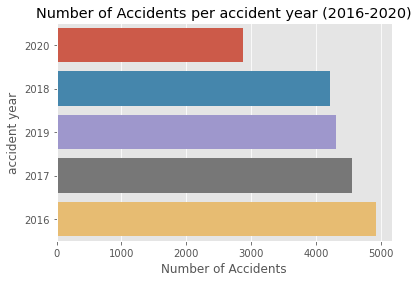

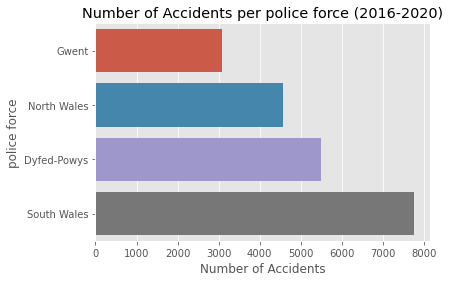

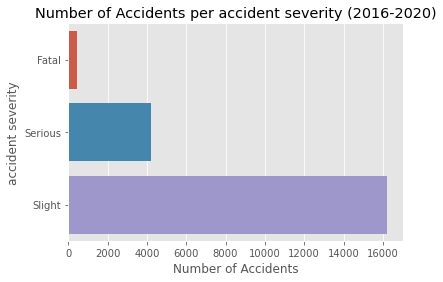

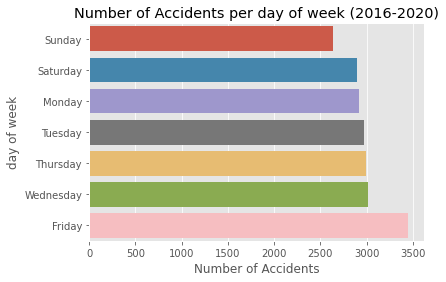

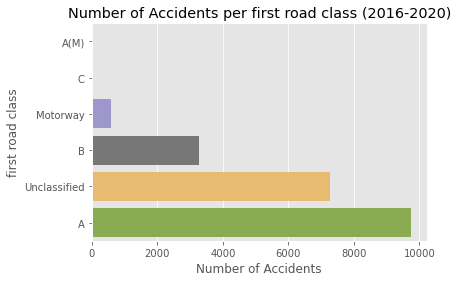

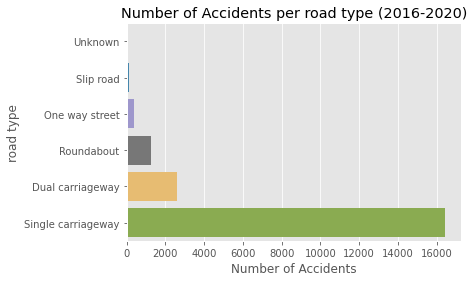

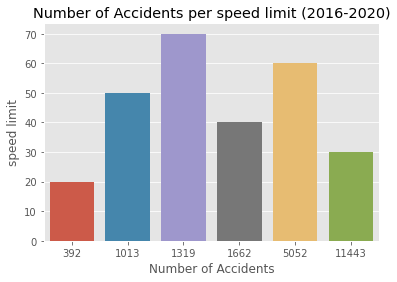

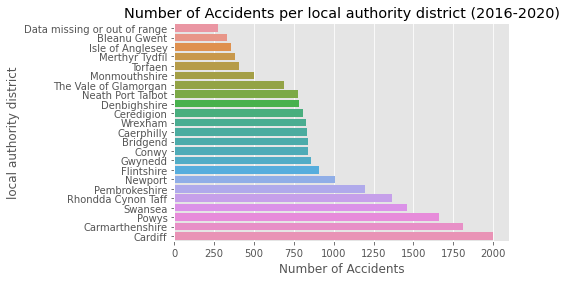

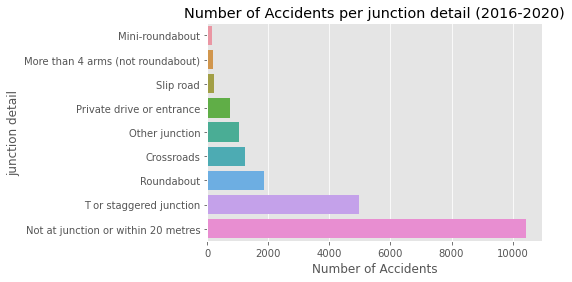

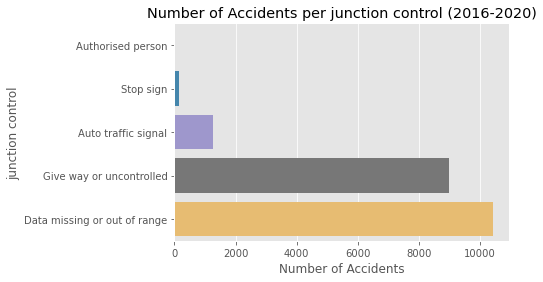

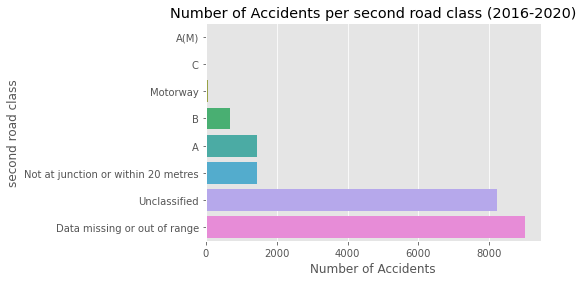

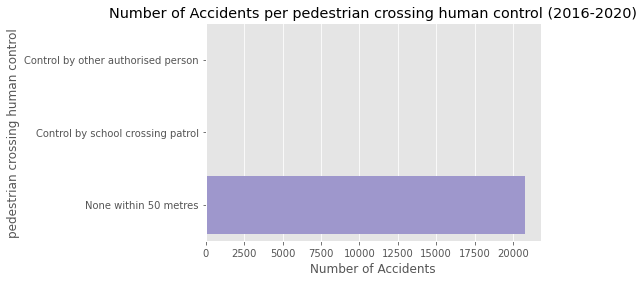

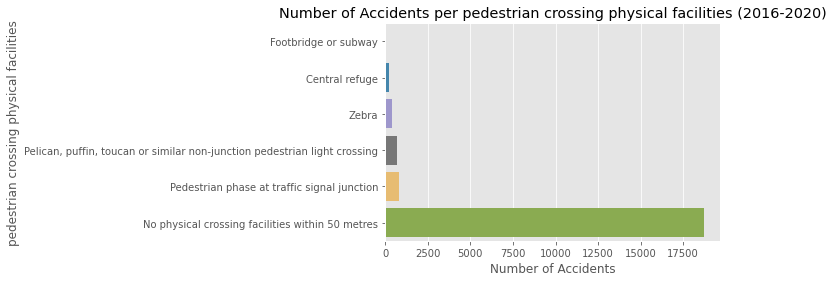

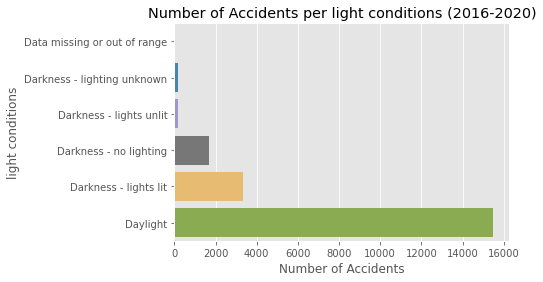

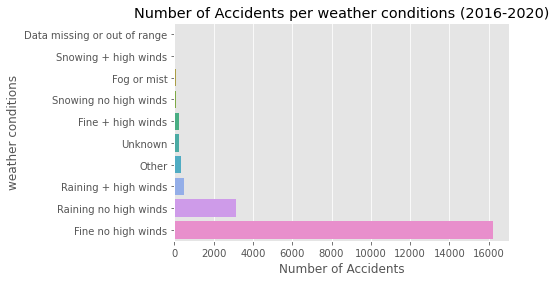

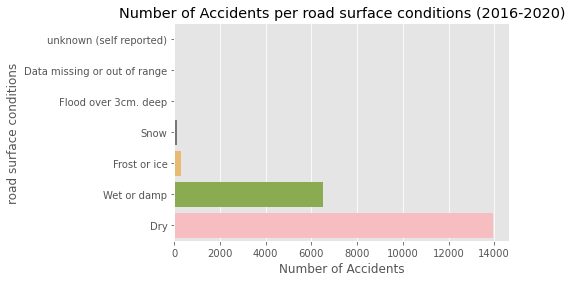

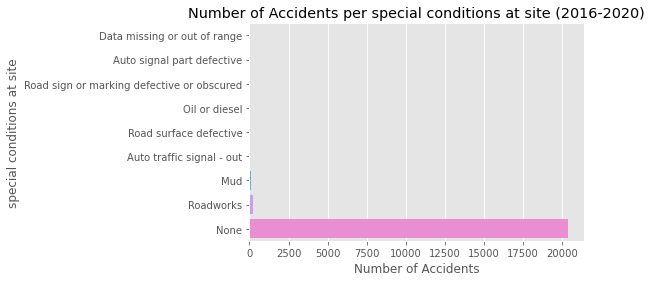

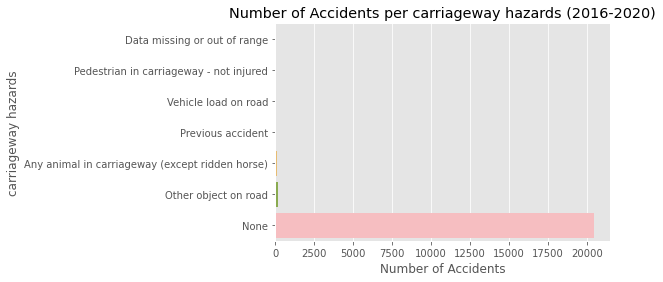

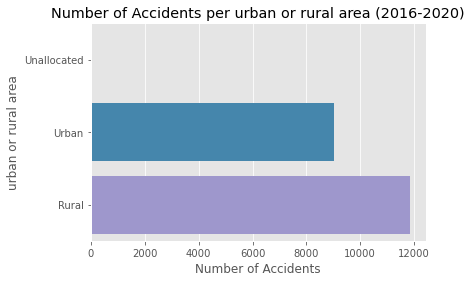

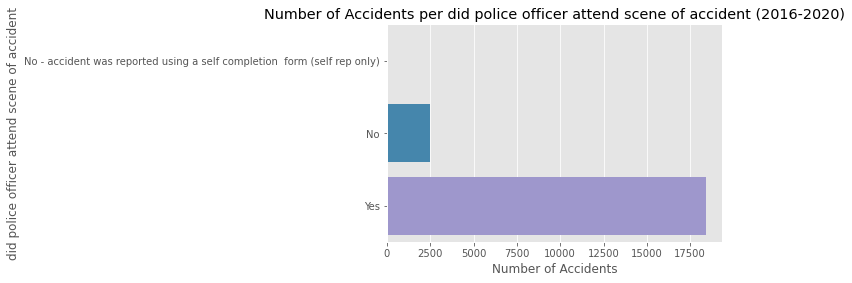

In [36]:
#Loop through each value in the list
for each_col in accident_cols:
    
    #Create barplot and set x, y and data parameters
    sns.barplot(x='accident_index',
                y=each_col,
                data=wales_accident.groupby(each_col)['accident_index'].
                count().reset_index().sort_values(by='accident_index'))
    
    #Add a title and labels to the bar plots
    plt.title("Number of Accidents per {} (2016-2020)".format(
        each_col.replace('_', ' ')))
    plt.ylabel(each_col.replace('_', ' '))
    plt.xlabel("Number of Accidents")
    
    #Display bar plot
    plt.show()

## Advanced Visualisations

**1. A Heat map of  all the accidents that occured in Wales from 2016 to 2020**

The folium package wa installed via PIP. The library was imported to visualise geospatial data. Foluim has plugins that can be used to produce a heat map.

In [37]:
#Import Relavant Packages
import folium
from folium import plugins

A copy of the Wales accident DataFrame needs to be made to select only the necessary columns needed for the heat map. The required columns are the longitude and latitude columns.

In [38]:
#Make a copy of the Wales accident DataFrame only selecting the relevant columns
wales_accident_map = wales_accident[['longitude','latitude']].copy()


Any null values present in the Wales accidents DataFrame must be removed to eliminate potential errors when creating the heat map.

In [39]:
#Strip away the null latitude and longitude values
wales_accident_map.dropna(inplace=True)

#Check to see if all null values have been removed
wales_accident_map.isnull().sum()

longitude    0
latitude     0
dtype: int64

The following fuction produce a heat map using latitude and longitude values of the Wales accidents DataFrame.

In [40]:
#Get the list of values from the latitude and longitude columns and merge them by using the zip() function.
accident_locations = list(zip(wales_accident_map.latitude, wales_accident_map.longitude))

#Function that Produces Heat Map
def generateHeatMap(default_location=[52.588160, -3.325960], default_zoom_start=7):
    
    #Configuring parameters of the base map layer
    base_map = folium.Map(height=500, location=default_location, control_scale=True, tiles="Stamen Toner", zoom_start=default_zoom_start)
    
    #Configuring parameters of the heat map overlay
    heat_map = plugins.HeatMap(accident_locations, radius=3, blur=2)
    
    #Adding heat map overlay to base layer
    base_map.add_child(heat_map)
    #returns heat map when function is called
    return base_map   

#Call the function to create heat map
generateHeatMap()

#### 2. A Sankey diagram showing the flow between columns in the Wales Accidents DataFrame

A Sankey Diagram is a visualisation technique that can be used to display flows between columns in a dataset. Several columns (nodes) are represented by rectangles or text. Their links are depicted with arrows or arcs that have a width proportional to the flow's importance or the quantity the flow represents.

In [41]:
#Import relevant packages
import plotly.graph_objects as go
import random

In [42]:
# Reordering the columns required in the order of interest for the diagram
sankey_df = wales_accident.reindex(["police_force","urban_or_rural_area","accident_year","accident_severity"], axis=1)

#Store names of the columns required
col_names = sankey_df.columns.tolist()
#Creating empty lists to store node label and categorical values of each column
node_labels = []
num_categorical_vals_per_col = []

#Loop through each value in column list and add unique values from the DataFrame to node and categorical list
for col in col_names:
    uniques = sankey_df[col].unique().tolist()
    node_labels.extend(uniques)
    num_categorical_vals_per_col.append(len(uniques))
    
#Creating empty lists to store required Data parameters (Source Node, Target Node, Value and Colors)
source = []
target = []
value = []
colors = []


for i, num_categories in enumerate(num_categorical_vals_per_col):    
    if i == len(num_categorical_vals_per_col)-1:
        break
    
    #Index is used to refer to the categories by index from the `node_labels` list
    start_index = sum(num_categorical_vals_per_col[:i])
    start_index_next = sum(num_categorical_vals_per_col[:i+1])
    end_index_next = sum(num_categorical_vals_per_col[:i+2])

    
    #Each value in the column name list (i) can also give us the category column to refer to
    col_name = col_names[i]
    next_col_name = col_names[i+1]
    
    grouped_df = sankey_df.groupby([col_name, next_col_name]).size()

    
    for source_i in range(start_index, start_index_next):
        for target_i in range(start_index_next, end_index_next):
            source.append(source_i)
            target.append(target_i)
            source_label = node_labels[source_i]
            target_label = node_labels[target_i]
            # if the index doesn't exist in the grouped_df, then the value is 0
            try:
                value.append(grouped_df[source_label][target_label])
            except:
                value.append(0)
            #Give a random color to the flow lines within the Sankey Diagram
            random_color = list(np.random.randint(256, size=3)) + [random.random()]
            random_color_string = ','.join(map(str, random_color))
            colors.append('rgba({})'.format(random_color_string))
            
#Define the links (connection between columns/nodes in the Sankey diagram)
link = dict(source=source, target=target, value=value, color=colors)

#Configuring display parameters of the Sankey Diagram using Plotly
fig = go.Figure(data=[go.Sankey(
    #Define the Nodes
      node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = node_labels,
      color = "purple"
    ),
    #Add links
    link = link)])

#Add title of digram
fig.update_layout(title_text="Sankey Diagram showing the flow through the Police force, Urbarn or Rural area, Accident Year and Accident Serverity columns", font_size=10)

#Display Sankey Diagram
fig.show()